In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    print("Original Zeros Matrix: ", P)
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [12]:
P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

Original Zeros Matrix:  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


In [14]:
seq_length = P.shape[1]
seq_length

4

In [5]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

In [9]:
fig = plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)
plt.show()

Original Zeros Matrix:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  8.21856190e-01 ...  9.99999994e-01
   1.03663293e-04  9.99999995e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.36414739e-01 ...  9.99999977e-01
   2.07326584e-04  9.99999979e-01]
 ...
 [ 3.79607739e-01 -9.25147537e-01 -6.25367561e-01 ...  9.99945674e-01
   1.00551700e-02  9.99949446e-01]
 [-5.73381872e-01 -8.19288245e-01  2.85050529e-01 ...  9.99944548e-01
   1.01588280e-02  9.99948398e-01]
 [-9.99206834e-01  3.98208804e-02  9.50151288e-01 ...  9.99943410e-01
   1.02624858e-02  9.99947339e-01]]


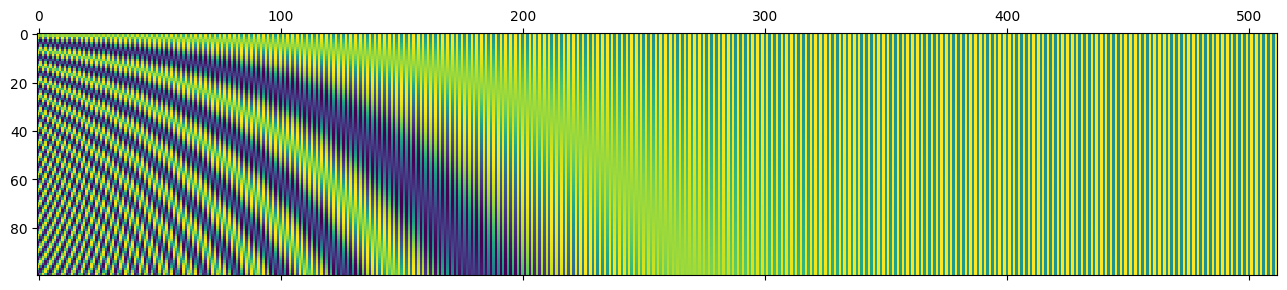

In [26]:
P = getPositionEncoding(seq_len=100, d=512, n=10000)
print(P)
plt.matshow(P)

# Positional Encoding

Positional encoding is used to provide the relative position for each token or work in a sequence (sentence). How does the Transformer implement the relative positioning of the tokens is what the positional encoding deals with. Exploring more on the positional encoding for the transformer architecture using keras. We use the dimension `d_model` across the embedding vectors so that any positional encoding vector is compatible. 

While it may seen natural to use integers like 1, 2, ..., to denote the position of the tokens, this number quickly grows and cannot be easily added to an embedding matrix. To ensure each position has a unique representation, the Transformers model uses the sine and cosine functions to generate a unique vector for each position in the sequence. 
<br><br>

1. The output of the sine and cosine functions are in [-1, 1]. This makes it normalized and wouldn't grow unmanageably like the integers.
2. No additional training has to be done, since unique representation is generated for each position.

# Embeddings

   - These represent the **semantic meaning** of the words or tokens in the input sequence.

   - Each token (word or sub-word) is mapped to a high-dimensional vector space, where tokens with similar meanings are placed closer together.

   - The embeddings are learned during training, so their values depend on the dataset and task.

   - These embeddings are created for each token in the input, providing the model with a vectorized representation of the sequence's content.


# Positional Encodings

   - Transformers have no inherent notion of sequence order due to their attention mechanism, so they rely on **positional encodings** to capture the order of tokens.

   - Positional encodings are **added to the embeddings** to indicate the position of each token in the sequence.

   - Unlike embeddings, these values do not depend on the specific tokens but on their position in the sequence. They are often generated through fixed functions (like sine and cosine waves) or are learnable parameters.

# *TRANSFORMERS FROM SCRATCH - KERAS*

# The Text Vectorizer Layer

In [35]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string, math, matmul, cast, float32
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'softmax' from 'keras.backend' (/Users/ramnaresh/anaconda3/envs/Transformers/lib/python3.11/site-packages/keras/api/backend/__init__.py)

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
output_sequence_length = 5
vocab_size = 10
sentences = [
    ["I am a robot"],
    ["you too robot"]
]

In [4]:
sentence_data = Dataset.from_tensor_slices(sentences)
for element in sentence_data:
    print(element)

tf.Tensor([b'I am a robot'], shape=(1,), dtype=string)
tf.Tensor([b'you too robot'], shape=(1,), dtype=string)


2024-10-26 22:42:08.927126: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-10-26 22:42:08.927196: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-26 22:42:08.927210: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-26 22:42:08.927500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-26 22:42:08.927533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-10-26 22:42:09.034991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
vectorize_layer = TextVectorization(
    output_sequence_length=output_sequence_length,
    max_tokens=vocab_size
)
vectorize_layer.adapt(sentence_data)

2024-10-26 22:42:12.050480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
word_tensors

<tf.Tensor: shape=(2, 1), dtype=string, numpy=
array([[b'I am a robot'],
       [b'you too robot']], dtype=object)>

In [7]:
vectorized_words = vectorize_layer(word_tensors)
vectorized_words

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[5, 6, 7, 2, 0],
       [3, 4, 2, 0, 0]])>

In [8]:
vectorize_layer.get_vocabulary()

['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']

# The Embedding Layer

## 1. The Word Embeddings

**The Embedding layer in TensorFlow Keras is used to convert positive integers (indexes) into dense vectors of fixed size. This layer is typically used to map input tokens (such as words) to dense vectors in a high-dimensional space.**

In [11]:
output_length = 6
word_embedding_layer = Embedding(vocab_size, output_length)

In [12]:
embedded_words = word_embedding_layer(vectorized_words)
embedded_words

<tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[-0.00593709, -0.00150137,  0.02099887, -0.03126019,
         -0.03323432, -0.00568653],
        [-0.0221747 ,  0.034369  , -0.02357764,  0.01958743,
         -0.0077994 ,  0.01950664],
        [-0.00069303,  0.03977958,  0.00045289, -0.02526742,
          0.00362606, -0.03831274],
        [-0.03721807, -0.03786997,  0.00796069,  0.03247042,
          0.03411616,  0.02038423],
        [ 0.00936139, -0.02954122, -0.03908286, -0.02912803,
         -0.01179541,  0.04708645]],

       [[ 0.03168953,  0.03596808, -0.00780054,  0.04615856,
          0.00961454, -0.03110822],
        [-0.013465  ,  0.0373416 , -0.03111568,  0.04296261,
          0.04449192,  0.01736942],
        [-0.03721807, -0.03786997,  0.00796069,  0.03247042,
          0.03411616,  0.02038423],
        [ 0.00936139, -0.02954122, -0.03908286, -0.02912803,
         -0.01179541,  0.04708645],
        [ 0.00936139, -0.02954122, -0.03908286, -0.02912803,
         -0.0

here, we see different output ever time we run the code, this is because of the random initialization of the weights

## 2. Position Embeddings

In [13]:
position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[-0.00895531 -0.04971364  0.04145062  0.0335958   0.0148635  -0.02944512]
 [ 0.00638443  0.0282979  -0.01765724  0.03267107  0.03199352 -0.04807109]
 [-0.04813155  0.0191501  -0.04759748  0.00943436  0.04242101  0.02329871]
 [ 0.00034474  0.02892944  0.02457109 -0.03664609 -0.00903064 -0.03729146]
 [ 0.02224482  0.03019425 -0.00706495  0.02650562 -0.03504751  0.02018673]], shape=(5, 6), dtype=float32)


In [14]:
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[-0.0148924  -0.05121501  0.06244949  0.00233561 -0.01837082
   -0.03513166]
  [-0.01579027  0.0626669  -0.04123489  0.0522585   0.02419412
   -0.02856444]
  [-0.04882459  0.05892968 -0.04714459 -0.01583306  0.04604707
   -0.01501404]
  [-0.03687333 -0.00894053  0.03253178 -0.00417567  0.02508552
   -0.01690723]
  [ 0.03160621  0.00065303 -0.04614781 -0.00262241 -0.04684292
    0.06727318]]

 [[ 0.02273422 -0.01374556  0.03365008  0.07975436  0.02447804
   -0.06055335]
  [-0.00708057  0.0656395  -0.04877292  0.07563368  0.07648544
   -0.03070167]
  [-0.08534962 -0.01871986 -0.03963679  0.04190478  0.07653717
    0.04368293]
  [ 0.00970613 -0.00061178 -0.01451177 -0.06577412 -0.02082605
    0.009795  ]
  [ 0.03160621  0.00065303 -0.04614781 -0.00262241 -0.04684292
    0.06727318]]], shape=(2, 5, 6), dtype=float32)


## Subclassing both the embeddings into one single Keras Embedding Layer

In [16]:
class PositionEmbeddingLayer(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, 
            output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim
        )
    
    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [17]:
# Example run using the subclass

my_embedding_layer = PositionEmbeddingLayer(output_sequence_length,
vocab_size, output_length)

# calling the embedding layer with the already vectorized words
embedded_layer_output = my_embedding_layer(vectorized_words)  
print("Output from my_embedded_layer: ", embedded_layer_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.0822711   0.02995607 -0.04695266 -0.0417315   0.01579332
    0.08976306]
  [-0.05356697  0.02744406  0.00785954 -0.04490644 -0.03655199
    0.07372903]
  [-0.02246498  0.05224217 -0.0021966  -0.00702905  0.01836982
    0.0039467 ]
  [ 0.036507    0.00320669  0.00990427 -0.04707669 -0.02466134
   -0.08288029]
  [ 0.01946665  0.0081067  -0.03466168 -0.02222303  0.0405574
    0.01837863]]

 [[-0.01434831 -0.00232184 -0.03073025 -0.06936125 -0.05385997
    0.07969798]
  [-0.03827442  0.04117052  0.02359898 -0.07391067  0.03331047
    0.04384872]
  [ 0.04016853 -0.02047877  0.05678846 -0.0063913  -0.01173102
   -0.02923156]
  [ 0.02814738  0.00777685 -0.03875342 -0.03622458  0.0212629
   -0.05380306]
  [ 0.01946665  0.0081067  -0.03466168 -0.02222303  0.0405574
    0.01837863]]], shape=(2, 5, 6), dtype=float32)


## Transformer-style Positional Encoding

![Transformer Positional Encoding](data/PosEncoding.png)

In [18]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        pos_embedding_matrix = self.get_position_encoding(seq_length, output_dim)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim,
            weights=[pos_embedding_matrix],
            trainable=False
        )
    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P
    
    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [21]:
attnisallyouneed_embedding = PositionEmbeddingFixedWeights(output_sequence_length,
vocab_size, output_length)
attnisallyouneed_output = attnisallyouneed_embedding(vectorized_words)
print("Output from my_embedded_layer: ", attnisallyouneed_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.9589243   1.2836622   0.23000172  1.9731903   0.01077196
    1.9999421 ]
  [ 0.56205547  1.5004725   0.3213085   1.9603932   0.01508068
    1.9999142 ]
  [ 1.566284    0.3377554   0.41192317  1.9433732   0.01938933
    1.999877  ]
  [ 1.0504174  -1.4061394   0.2314966   1.9860148   0.01077211
    1.9999698 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]

 [[ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [ 0.08466846 -0.11334133  0.23099795  1.9817369   0.01077207
    1.9999605 ]
  [ 1.8185948  -0.8322937   0.185397    1.9913884   0.00861771
    1.9999814 ]
  [ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]], shape=(2, 5, 6), dtype=float32)


## Visualization of final embeddings

In [24]:
technical_phrase = "to understand machine learning algorithms you need to understand concepts such as gradient of a function Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death when he addressed the second virginia convention in march"

In [25]:
technical_phrase

'to understand machine learning algorithms you need to understand concepts such as gradient of a function Hessians of a matrix and optimization etc'

In [26]:
wise_phrase

'patrick henry said give me liberty or give me death when he addressed the second virginia convention in march'

In [27]:
total_vocabulary = 200
seq_length = 20
final_output_len = 50
phrase_vectorization_layer = TextVectorization(output_sequence_length=seq_length,
max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])

In [28]:
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase], dtype=tf.string)
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

In [29]:
random_weights_embedding_layer = PositionEmbeddingLayer(
    seq_length,
    total_vocabulary,
    final_output_len
)

fixed_weights_embedding_layer = PositionEmbeddingFixedWeights(
    seq_length,
    total_vocabulary,
    final_output_len
)

In [30]:
random_embedding = random_weights_embedding_layer(vectorized_phrases)
fixed_embedding = fixed_weights_embedding_layer(vectorized_phrases)

In [33]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

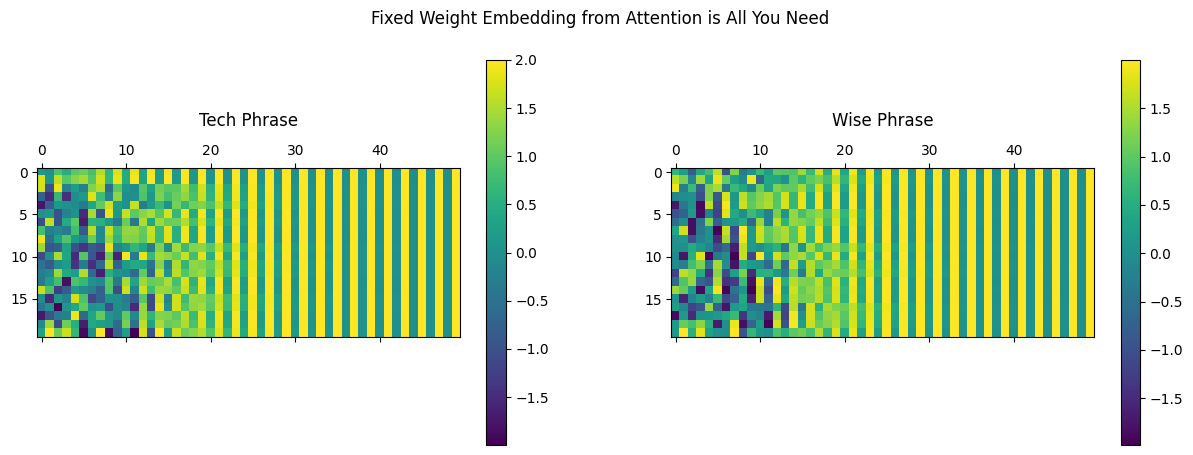

In [34]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(fixed_embedding[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()

## Scaled Dot-Product Attention 

In [46]:
from keras.layers import Softmax
# Implementing the Scaled-Dot Product Attention
class DotProductAttention(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, queries, keys, values, d_k, mask=None):
        # Scoring the queries against the keys after transposing the latter, and scaling
        scores = matmul(queries, keys, transpose_b=True) / math.sqrt(cast(d_k, float32))
        # Apply mask to the attention scores
        if mask is not None:
            scores += -1e9 * mask
        # Computing the weights by a softmax operation
        weights = Softmax()(scores)
        # Computing the attention by a weighted sum of the value vectors
        return matmul(weights, values)

In [47]:
from numpy import random
input_seq_length = 5  # Maximum length of the input sequence
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
batch_size = 64  # Batch size from the training process
queries = random.random((batch_size, input_seq_length, d_k))
keys = random.random((batch_size, input_seq_length, d_k))
values = random.random((batch_size, input_seq_length, d_v))
attention = DotProductAttention()
print(attention(queries, keys, values, d_k=d_k))

tf.Tensor(
[[[0.30350488 0.5687835  0.41093698 ... 0.6417963  0.6789362  0.5533651 ]
  [0.31769198 0.5478591  0.4180685  ... 0.6150775  0.65305346 0.5693253 ]
  [0.3008873  0.570897   0.42842314 ... 0.6387068  0.66008186 0.54613304]
  [0.30198887 0.57057846 0.42364138 ... 0.6390438  0.66133094 0.5466983 ]
  [0.32039732 0.5388201  0.39793944 ... 0.61036265 0.6588931  0.5688057 ]]

 [[0.57460344 0.3967715  0.5790143  ... 0.49223614 0.4799234  0.5645013 ]
  [0.5848392  0.39715803 0.57214737 ... 0.49995    0.47493732 0.56957483]
  [0.57650906 0.38075903 0.582309   ... 0.48517597 0.48389617 0.5843828 ]
  [0.5696317  0.3994438  0.5711802  ... 0.49075043 0.46958992 0.5619256 ]
  [0.5818188  0.397704   0.5673158  ... 0.4973408  0.46997017 0.5681382 ]]

 [[0.6602404  0.5595665  0.5215856  ... 0.4824776  0.3116746  0.5403183 ]
  [0.6467378  0.58552015 0.52935714 ... 0.46958402 0.30724248 0.55844146]
  [0.65968585 0.569569   0.5193494  ... 0.4811247  0.31156635 0.5507519 ]
  [0.6424247  0.5716294